In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
image = cv2.imread('images/airplane.png')

In [3]:
cv2.imshow('Image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
def showImage(info,image):
    cv2.imshow(info,image)
    cv2.waitKey(0)
    cv2.destroyWindow(info)


In [7]:
showImage("Input Image",image)

In [8]:
showImage("Red Image",image[:,:,1])

In [6]:
mono=image[:,:,1]
mono.shape
# mono

(512, 512)

In [6]:
print("Max value ",mono.max(),"Min value",mono.min())

Max value  255 Min value 0


In [7]:
dict={}
for i in range(mono.shape[0]): #for each row
    for j in range(mono.shape[1]): #for each column of selected row [2,0], [2,1], ... [2,639]
      dict[mono[i,j]]=dict.get(mono[i,j],0)+1  

In [8]:
dict.get(148,0)+1

457

In [9]:
#validating using below function which counts no of occurance of value 91 in 2D array mono
np.count_nonzero(mono==91)

703

In [112]:
# dict.values() #get values
# dict.keys() #get keys
#dict.items()

In [10]:
import matplotlib.pyplot as plt

<BarContainer object of 235 artists>

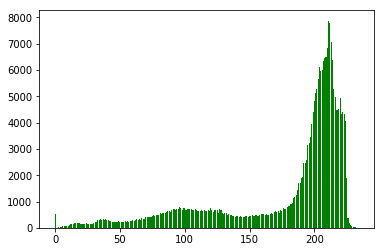

In [11]:
plt.bar(dict.keys(), dict.values(), color='g')

In [18]:
import matplotlib.pyplot as plt

def getHistogram(monoImg,normalize=False):
    dict={}
    arr=np.zeros(256)
    for i in range(mono.shape[0]): #for each row
        for j in range(mono.shape[1]): #for each column of selected row [2,0], [2,1], ... [2,639]
            dict[mono[i,j]]=dict.get(mono[i,j],0)+1
            arr[mono[i,j]]=arr[mono[i,j]]+1
    if(normalize==True):
        arr=arr/(mono.shape[0]*mono.shape[1])
        plt.bar(np.arange(0,256), arr, color='g')
    else:
        plt.bar(dict.keys(), dict.values(), color='g')
#     return dict

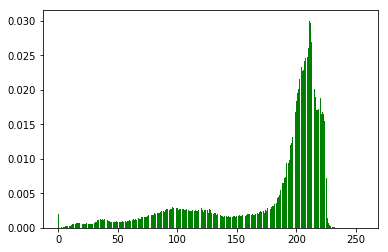

In [22]:
getHistogram(mono,normalize=True) # with normalization (see the y axis range)

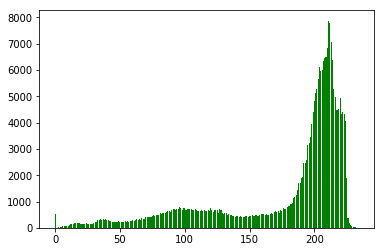

In [23]:
getHistogram(mono) # without normalization (see the y axis range)

#testing binarization on the basis of threshold

In [12]:
mono

array([[142, 143, 139, ...,  94,  94,  95],
       [144, 144, 140, ...,  96,  97,  97],
       [142, 143, 143, ...,  99,  98,  98],
       ...,
       [  7,   8,  11, ...,   8,  13,   9],
       [  9,   9,  11, ...,   8,  13,  13],
       [ 12,  11,  11, ...,  12,  11,  11]], dtype=uint8)

In [13]:
def binarize(img,threshold):
    imgcpy=img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i,j]<=threshold):
                imgcpy[i,j]=255
            else:
                imgcpy[i,j]=0
    return imgcpy

In [19]:
#mco = mono.copy()

In [14]:
showImage("binar",binarize(mono,120))

In [18]:
mono.shape


(480, 640)

In [20]:
def negative(image):
    maxval=image.max()
    return (maxval-image)

showImage('negative', negative(image))

In [147]:
def getFilter(name):
    return {
        'MEAN': np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]]),
        'WEIGHTEDMEAN': np.array([[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]]),
        'HIGHPASS':np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    }.get(name,np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]]))

In [64]:
def correlation(input,filter):
    sum=0
    for i in range(filter.shape[0]):
        for j in range(filter.shape[0]):
            sum +=input[i,j]*filter[i,j]
    middle = int((filter.shape[0]+1)/2)
    output = np.copy(input)
    output[middle-1,middle-1]=int(round(sum))
    return output

In [150]:
#convolution
from scipy import ndimage
def convolution(input,filter):
    return ndimage.convolve(input,filter)


In [131]:
def maxcorrelation(mat):
    matrix=mat.copy()
    middle = int((matrix.shape[0]+1)/2)
    matrix[middle-1,middle-1]=matrix.max()
    return matrix
def mincorrelation(mat):
    matrix=mat.copy()
    middle = int((matrix.shape[0]+1)/2)
    matrix[middle-1,middle-1]=matrix.min()
    return matrix
    
def mediancorrelation(mat):
    matrix=mat.copy()
    middle = int((matrix.shape[0]+1)/2)
    matrix[middle-1,middle-1]=np.median(matrix)
    return matrix
    

In [163]:
#spatial filter SMOOTHING

filtersize=3 # 3x3 filter so filter = [[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]]

def smoothing(img,fltertype="MEAN",padding=1): #padding vaneko 0 padding default ma 1 ho
    #showImage('orig',img)
    if(fltertype=='LOWPASS'):
        flter = getFilter('HIGHPASS')
    else:
        flter=getFilter(fltertype)
    imgcpy=img.copy()
    movement_vertical = imgcpy.shape[0]-flter.shape[0]
    movement_horizontal = imgcpy.shape[1]-flter.shape[1]
    #print("row ma :",movement_vertical,"column ma",movement_horizontal)
    for i in range(movement_vertical):
        for j in range (movement_horizontal):
            mat1 = img[i:i+flter.shape[0], j:j+flter.shape[0]]
            #matbkup=mat1.copy()
            if(fltertype=='MAX'):
                imgcpy[i:i+flter.shape[0], j:j+flter.shape[0]]=maxcorrelation(mat1)
                
            elif(fltertype=='MIN'):
                imgcpy[i:i+flter.shape[0], j:j+flter.shape[0]]=mincorrelation(mat1)
                
            elif(fltertype=='MEDIAN'):
                imgcpy[i:i+flter.shape[0], j:j+flter.shape[0]]=mediancorrelation(mat1) 
            else:
                imgcpy[i:i+flter.shape[0], j:j+flter.shape[0]]=correlation(mat1,flter)
            #print(matbkup,"op",imgcpy[i:i+flter.shape[0], j:j+flter.shape[0]],"\n")
    if(fltertype=='LOWPASS'):
        return (img-imgcpy)
    return imgcpy

In [185]:
def smoothingConvolution(img,fltertype='MEAN'):
    if(fltertype=='LOWPASS'):
        flter=getFilter('HIGHPASS')
        hp=convolution(img,flter)
        return (img-hp)
    elif(fltertype=='HIGHBOOST'):
        flter=getFilter('HIGHPASS')
        hp=convolution(img,flter)
        return (img+hp)
    else:
        flter=getFilter(fltertype)
        return convolution(img,flter)
    

In [186]:
showImage('highpass',smoothingConvolution(mono,fltertype='HIGHBOOST'))

In [165]:
# window= np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])
# filters = ["MAX","MIN",]
# processedimg = smoothing(mono,fltertype="MEDIAN")
# print("original",mono[3:6,3:6],"processed",processedimg[3:6,3:6])
# processedimg=smoothing(mono,fltertype="MEAN")
# print("original",mono[3:6,3:6],"processed",processedimg[3:6,3:6])
# processedimg = smoothing(mono,fltertype="MIN")
# print("original",mono[3:6,3:6],"processed",processedimg[3:6,3:6])
# processedimg = smoothing(mono,fltertype="MAX")
# print("original",mono[:3,:3],"processed",processedimg[:3,:3])

# showImage('LOWPASS',smoothing(mono,fltertype='LOWPASS'))
showImage('highpass',smoothing(mono,fltertype='LOWPASS'))

In [137]:
filters = ["MEAN","MIN","MAX","MEDIAN"]

for f in filters:
#     smoothing(mono,fltertype=f)
    showImage(f,smoothing(mono,fltertype=f))

In [1]:
# np.append()

In [32]:
# showImage("binar",smoothing(mono,getFilter('WEIGHTEDMEAN')))

In [199]:
showImage("orig",mono)

# Histogram based transformation
## Equalization garna

In [228]:
def histogram(image):
    hist = np.zeros((256))
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            a = image[i,j]
            hist[a] += 1
            int(hist[a])
    
    return hist.astype(np.int)

In [234]:
def cumulativeHistogram(hist):
    cum_hist = hist.copy()
    
    for i in np.arange(1,256):
        cum_hist[i]=cum_hist[i]+cum_hist[i-1]
    
    return cum_hist.astype(np.int)
    

In [238]:
hist= histogram(mono)
cu_hist= cumulativeHistogram(hist)


In [242]:
def histogramEqualization(image,cum_hist):
    totalpixels = image.shape[0]*image.shape[1]
    imgcpy = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            o = image[i,j]
            new = cum_hist[o]*255/totalpixels
            imgcpy[i,j]=new
    return imgcpy

In [252]:
showImage('equalize',histogramEqualization(mono,cu_hist))
showImage('original',mono)

## histogram matching

In [294]:
def histogramMatching(image,ref_img):
    pixels_ref = ref_img.shape[0]*ref_img.shape[1]
    pixels = image.shape[0]*image.shape[1]
    
    hist= histogram(image)
    hist_ref = histogram(ref_img)
    
    cum_hist = cumulativeHistogram(hist)
    cum_hist_ref= cumulativeHistogram(hist_ref)
    
    cum_hist_prob = cum_hist/pixels
    cum_hist_ref_prob = cum_hist_ref/pixels_ref
    
    imgcpy = image.copy()
    
    new = np.zeros(256)
    
    for a in range(256):
        j = 255;
        while True:
            new[a]= j
            j= j-1
            if j<0 or cum_hist_prob[a]>cum_hist_ref_prob[j]:
                break

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            old = image[i,j]
            imgcpy[i,j]=new[old]
    
    return imgcpy

In [295]:
inputimg = cv2.imread('images/cat.png',cv2.IMREAD_GRAYSCALE)
refimg= cv2.imread('images/boat.png',cv2.IMREAD_GRAYSCALE)
# showImage("inpu",inputimg)
showImage('HistogramMatching',histogramMatching(inputimg,refimg))

## Box, Gaussian and Laplacian filters

In [304]:
gauss = (1/57)*np.array([
    [0,1,2,1,0],
    [1,3,5,3,1],
    [2,5,9,5,2],
    [1,3,5,3,1],
    [0,1,2,1,0]
])

laplacian = (1/16)*np.array([
    [0,0,-1,0,0],
    [0,-1,-2,-1,0],
    [-1,-2,16,-2,-1],
    [-1,-2,16,-2,-1],
    [0,0,-1,0,0]
])

box = (1/9)*np.array([
    [0,0,0,0,0],
    [0,1,1,1,0],
    [0,1,1,1,0],
    [0,1,1,1,0],
    [0,0,0,0,0]
])

In [313]:
def linearFilter(image,flter):
    imcpy = image.copy()
    for i in np.arange(2,image.shape[0]-2):
        for j in np.arange(2,image.shape[1]-2):
            sum=0
            for k in np.arange(-2,3):  #-2,-1,0,1,2
                for l in np.arange(-2,3):
                    a =image[i+k,j+l] #neighbours ko value
                    p= flter[k+2,l+2]
                    sum += p*a
            
            imcpy[i,j]=sum
    
    return imcpy

In [314]:
gaussianimg=linearFilter(inputimg,gauss)


In [320]:
laplacianimg = linearFilter(inputimg,laplacian)

In [319]:
boximg= linearFilter(inputimg,box)

In [321]:
showImage("input",inputimg)
showImage("gaussian",gaussianimg)
showImage("laplacian",laplacianimg)
showImage("boxfilter",boximg)

In [325]:
np.arange(1,4)

array([1, 2, 3])

## Discrete Fourier Transform (DFT and FFTs Implementation attempt)

In [331]:
def DFT(x): 
    x = np.asarray(x,dtype=float)
    N=x.shape[0]
    n=np.arange(N)
    k= n.reshape((N,1))
    M=np.exp(-2j * np.pi * k * n/N)
    return np.dot(M,x)

In [349]:
def FFT(x):
    x = np.asarray(x,dtype=float)
    N=x.shape[0]
    
    if(N % 2 > 0):
       raise ValueError("image shape must be in power of 2")
    elif (N <= 32):
        return DFT(x)
    else:
        x_even = FFT(x[::2])
        x_odd = FFT(x[1::2])
        factor= np.exp(-2j * np.pi*np.arange(N)/N)
        return np.concatenate([x_even + factor[:N/2]*x_odd,x_even + factor[N/2:]*x_odd])

In [329]:
x = np.random.random(20)
x

array([0.68053975, 0.08093592, 0.82020477, 0.19862291, 0.5623077 ,
       0.56026763, 0.28355289, 0.18908106, 0.46769745, 0.35801114,
       0.36984055, 0.86049909, 0.17050322, 0.54513969, 0.35854506,
       0.90470629, 0.54924912, 0.20453826, 0.39763256, 0.51687357])

In [332]:
DFT(x)

array([ 9.07874865+0.00000000e+00j,  0.13979246+5.63105468e-01j,
       -0.14181966-5.43119798e-01j, -0.29820095-1.94322481e-01j,
        1.19680941+1.52561866e-01j,  0.20052141+9.20890276e-01j,
       -1.01536314+1.32470051e-01j, -0.19823622+1.24756191e+00j,
        0.55220181-2.01126842e-01j,  1.7096193 +1.29143699e+00j,
        0.2413975 +7.01256452e-15j,  1.7096193 -1.29143699e+00j,
        0.55220181+2.01126842e-01j, -0.19823622-1.24756191e+00j,
       -1.01536314-1.32470051e-01j,  0.20052141-9.20890276e-01j,
        1.19680941-1.52561866e-01j, -0.29820095+1.94322481e-01j,
       -0.14181966+5.43119798e-01j,  0.13979246-5.63105468e-01j])

In [333]:
np.allclose(DFT(x),np.fft.fft(x))

True

In [351]:
np.allclose(FFT(x),np.fft.fft(x))

True

In [432]:
def DFT2D(x):
    m,n =x.shape
    o = x.copy()
    o = o.astype(np.complex)      
    for k_m in range(m):
        for k_n in range(n):
            sum=complex(0,0)
            for i in range(m):
                for j in range(n):  
                      sum = sum + x[i,j]*np.exp(-2j * np.pi *(k_m*i/m + k_n*j/n) )
                
            o[k_m,k_n]=sum
    return o
                    

In [433]:
y=np.array([[1,2,3],[4,5,6]])
DFT2D(y)

array([[ 2.10000000e+01+0.00000000e+00j, -3.00000000e+00+1.73205081e+00j,
        -3.00000000e+00-1.73205081e+00j],
       [-9.00000000e+00-1.83697020e-15j,  2.66453526e-15+5.32907052e-15j,
         2.66453526e-15+4.44089210e-15j]])

In [434]:
np.allclose(DFT2D(y),np.fft.fft2(y))

True

In [ ]:
FFT2D(x):
    

In [355]:

a=np.arange(1,4) `
np.dot(y,a)

array([14, 32])

In [ ]:
def DFT2D(x):
    